In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pmd_genres = pd.read_csv("")
emd_genres = pd.read_csv("")

In [3]:
# Filter only matching Track IDs
matching_tracks = pmd_genres[pmd_genres['Track ID'].isin(emd_genres['Track ID'])]
matching_tracks.reset_index(drop=True, inplace=True)

# Calculate percentage of PMD tracks in EMD
percentage_overlap = (len(matching_tracks) / len(pmd_genres)) * 100

# Print number of overlapping tracks and percentage
print(f"Number of overlapping tracks: {len(matching_tracks)}")
print(f"Percentage of PMD tracks found in EMD: {percentage_overlap:.2f}%")

matching_tracks

Number of overlapping tracks: 378
Percentage of PMD tracks found in EMD: 20.18%


,Track ID,Artist,Track name,reducedGenre,Playlist
0,3v2dHPoXhfVVZ6HQBfjQOh,Son Mieux,Tonight,Pop,DOMINANT
1,0mflMxspEfB0VbI1kyLiAv,Noah Kahan,Stick Season,Pop,DOMINANT
2,17phhZDn6oGtzMe56NuWvj,Teddy Swims,Lose Control,Pop,DOMINANT
3,3dj4wgM3cPeuLwMNHDuBon,Teddy Swims,The Door,Pop,DOMINANT
4,59WN2psjkt1tyaxjspN8fp,Rage Against The Machine,Killing In The Name,Rock,DOMINANT
...,...,...,...,...,...
373,4RL77hMWUq35NYnPLXBpih,Birdy,Skinny Love,Pop,MOSART
374,3dYD57lRAUcMHufyqn9GcI,Hozier,Take Me To Church,Pop,MOSART
375,2VxeLyX666F8uXCJ0dZF8B,Lady Gaga,Shallow,Pop,MOSART
376,3bNv3VuUOKgrf5hu3YcuRo,Adele,Someone Like You,Pop,MOSART


In [11]:
# Function to calculate genre proportions
def calculate_genre_proportions(df):
    genre_counts = df['reducedGenre'].value_counts()
    total_tracks = len(df)
    genre_proportions = (genre_counts / total_tracks) * 100  # Convert to percentage
    # Create a DataFrame with results
    genre_proportion_df = pd.DataFrame({
        'Genre': genre_proportions.index,
        'Proportion (%)': genre_proportions.values,
        'Track count': genre_counts.values
    }).sort_values(by='Proportion (%)', ascending=False)

    return genre_proportion_df

# Calculate overall genre proportions
overall_genre_proportions = calculate_genre_proportions(matching_tracks)
overall_genre_proportions

,Genre,Proportion (%),Track count
0,Pop,52.645503,199
1,Rock,20.899471,79
2,R&B,7.407407,28
3,Electronic,6.084656,23
4,Hip Hop,5.555556,21
5,Folk/Acoustic,3.968254,15
6,Metal,1.587302,6
7,Latin,0.529101,2
8,Easy listening,0.529101,2
9,New age,0.264550,1


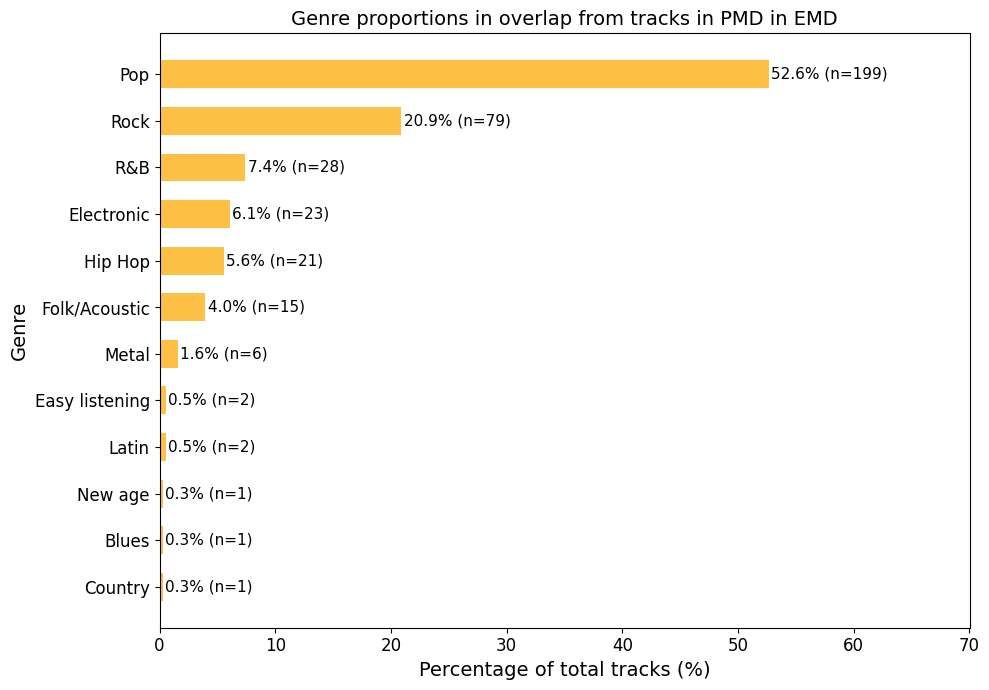

In [12]:
# Sort genres by proportion in descending order (highest to lowest)
overall_genre_proportions = overall_genre_proportions.sort_values(by='Proportion (%)', ascending=True)

# Plot overall genre proportions with horizontal bars
plt.figure(figsize=(10, 7))
bar_width = 0.6  # Adjusted for a clean academic look

# Plot horizontal bar chart
plt.barh(
    overall_genre_proportions['Genre'],
    overall_genre_proportions['Proportion (%)'],
    color="#FFC145",
    height=bar_width,
)

# Add labels with percentage and track count (n=)
for index, (percentage, track_count) in enumerate(zip(overall_genre_proportions['Proportion (%)'], overall_genre_proportions['Track count'])):
    plt.text(percentage + 0.2, index, f"{percentage:.1f}% (n={track_count})", va="center", fontsize=11)

# Add axis labels and title
plt.xlabel("Percentage of total tracks (%)", fontsize=14)
plt.ylabel("Genre", fontsize=14)
plt.title("Genre proportions in overlap from tracks in PMD in EMD", fontsize=14)
plt.xticks(fontsize=12)
plt.xlim(0, 70)
plt.yticks(fontsize=12)

# Improve layout and save figure
plt.tight_layout()
plt.show()